In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# WCS

The header of a FITS file image may contain World Coordinate System (WCS) keywords; these defines the transformation to map the pixel locations in the image to their real-world units, such as their position on the sky sphere.

`astropy.wcs` contains utilities for managing World Coordinate System (WCS) transformations in FITS files.

http://docs.astropy.org/en/stable/wcs/


The [`all_world2pix`](http://docs.astropy.org/en/stable/api/astropy.wcs.WCS.html#astropy.wcs.WCS.all_world2pix) method
transforms world coordinates to pixel coordinates, using numerical iteration to invert the full forward transformation all_pix2world with complete distortion model.
The arguments are the the RA,DEC coordinates and the *origin*: the coordinate in the upper left corner of the image. In FITS and Fortran standards, this is 1. In Numpy and C standards this is 0.

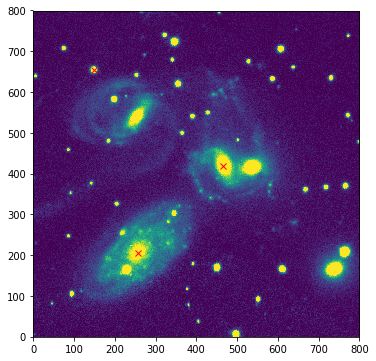

In [2]:
from astropy.io import fits
from astropy.wcs import WCS

fitsfile="stephans_quintet.fits"
# lists of RA and DEC of 3 objects
ra=[338.993270,339.014381,339.025233]
dec=[33.966057,33.948273,33.985596]

hdr=fits.getheader(fitsfile,0)
ima=fits.getdata(fitsfile,0)

wcs=WCS(hdr) # create the wcs from the header

# transform RA DEC in pixel coordinates.
# the origin is 0 (following python standard)
x,y=wcs.all_world2pix(ra,dec,0)

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)
ax.imshow(ima,origin='lower',vmin=0,vmax=.5)
ax.plot(x,y,'xr')

In this second example we plot the image using the [`WCSAxes`](http://docs.astropy.org/en/stable/visualization/wcsaxes)

Read the  [Initializing axes with world coordinates](http://docs.astropy.org/en/stable/visualization/wcsaxes/initializing_axes.html#initialization) guide

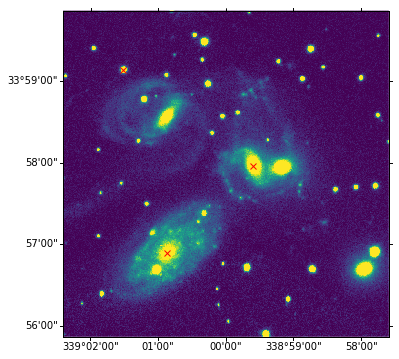

In [3]:
fig=plt.figure(figsize=(6,6))

# projection=wcs!
ax=fig.add_subplot(111,projection=wcs)
ax.imshow(ima,origin='lower',vmin=0,vmax=.5)

# the RA.DEC -> pixel transformation is done here
ax.plot(ra,dec,'xr',transform=ax.get_transform('world'))

# cutouts with astropy

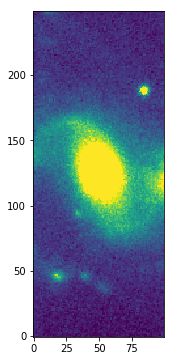

In [4]:
from astropy.nddata import Cutout2D

position=x[0],y[0]

size = (250, 100) # in pixels 
# not that sizes are (ny,nx)

cutout = Cutout2D(ima, position, size)

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)
ax.imshow(cutout.data,origin='lower',vmin=0,vmax=.5)

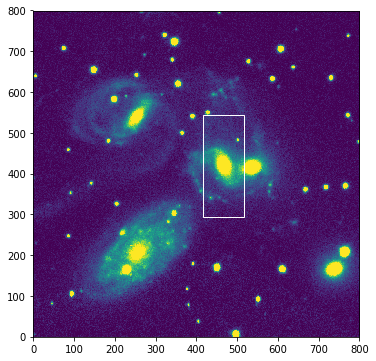

In [5]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)
ax.imshow(ima,origin='lower',vmin=0,vmax=.5)
cutout.plot_on_original(color='white')

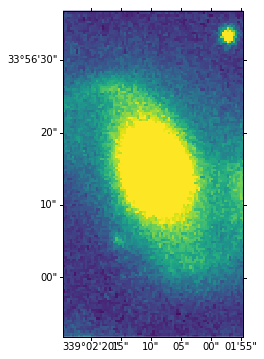

In [6]:
from astropy import units as u
from astropy.coordinates import SkyCoord

position=SkyCoord(ra=ra[0]*u.degree,dec=dec[0]*u.degree)
size = (45*u.arcsec,25*u.arcsec)
# sizes are (dy,dx)

# now you need to define the wcs keyword
cutout = Cutout2D(ima, position, size, wcs=wcs)

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111,projection=wcs)
ax.imshow(cutout.data,origin='lower',vmin=0,vmax=.5)
